In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [42]:
df=pd.read_csv("/content/house_price_regression_data_leaning.csv")

In [43]:
df.shape

(1460, 81)

In [44]:
cat_var=df.select_dtypes(include="object")
cat_var.shape

(1460, 43)

In [45]:
cat_var.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [46]:
per_cat_var=cat_var.isnull().mean()*100 # nan value of percentage

In [47]:

per_cat_var[per_cat_var>20].keys()

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [48]:
missing=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_var.drop(columns=missing,inplace=True)

In [49]:
cat_var.shape

(1460, 37)

In [51]:
all_missing_per=cat_var.isnull().mean()*100

In [59]:
missing_value_gre_0=all_missing_per[all_missing_per>0].keys()

In [54]:
missing_value_gre_0

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [55]:
cat_var["BsmtQual"].fillna("missing")

,BsmtQual
0,Gd
1,Gd
2,Gd
3,TA
4,Gd
...,...
1455,Gd
1456,Gd
1457,TA
1458,TA


In [56]:
cat_var["BsmtQual"].mode() # mode value

,BsmtQual
0,TA


In [57]:
cat_var["BsmtQual"].value_counts() # count of value

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


In [58]:
cat_var["BsmtQual"].fillna(cat_var["BsmtQual"].mode()[0]) # fill of mode value

,BsmtQual
0,Gd
1,Gd
2,Gd
3,TA
4,Gd
...,...
1455,Gd
1456,Gd
1457,TA
1458,TA


In [64]:
for var in missing_value_gre_0:
  cat_var[var].fillna(cat_var[var].mode()[0],inplace=True)
  print(var, "=" ,cat_var[var].mode()[0])

BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [65]:
cat_var.isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


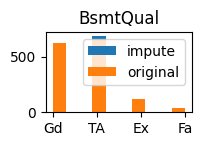

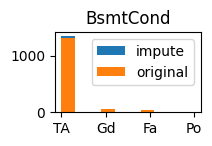

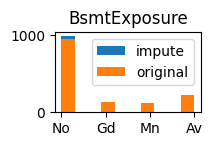

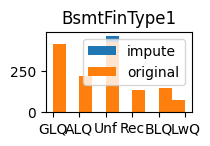

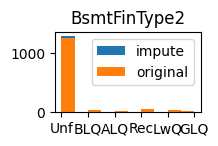

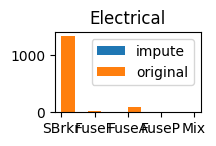

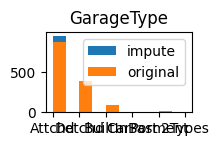

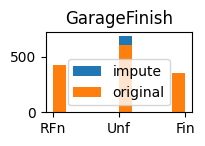

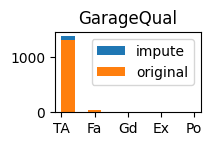

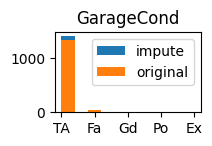

In [72]:
for i , var in enumerate(missing_value_gre_0):
  plt.subplot(4,3,i+1)
  plt.title(var)
  plt.hist(cat_var[var],label="impute")
  plt.hist(df[var].dropna(),label="original")\

  plt.legend()
  plt.show()